In [2]:

from google.colab import files

uploaded = files.upload()

Saving Philadelphia_Crime_Rate_noNA.csv.zip to Philadelphia_Crime_Rate_noNA.csv.zip


In [4]:
from zipfile import ZipFile
file_name = "Philadelphia_Crime_Rate_noNA.csv.zip"
with ZipFile(file_name,'r')as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
!pip install turicreate


     |████████████████████████████████| 92.0MB 66kB/s 
     |████████████████████████████████| 3.4MB 48.1MB/s 
     |████████████████████████████████| 86.4MB 50kB/s 
     |████████████████████████████████| 3.6MB 47.6MB/s 
     |████████████████████████████████| 327kB 56.2MB/s 
     |████████████████████████████████| 450kB 47.4MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 3.8MB 46.9MB/s 
     |████████████████████████████████| 18.3MB 267kB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-cp36-none-any.whl size=13702 sha256=dadd87986b2522c27575806037d81efcf20a6a8063f831295bc3ca7f25c46ac1
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320849 sha256=2830515d6e3a89ec7bf8bde4b56cfb215db2260c46957271751ddf27046a72f9
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40a

In [7]:
import turicreate
sales = turicreate.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv/')
sales

Read 99 lines. Lines per second: 5842.43

Finished parsing file /content/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.01703 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.012654 secs.

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [8]:
turicreate.show(sales["CrimeRate"], sales["HousePrice"])

Materializing X axis SArray

Materializing Y axis SArray

In [9]:
crime_model = turicreate.linear_regression.create(
    sales,
    target="HousePrice",
    features=['CrimeRate'],
    validation_set=None,
    verbose=False
)

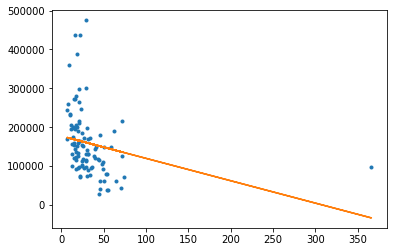

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(sales),'-')

In [13]:
sales_noCC = sales[sales['MilesPhila'] != 0.0] 
turicreate.show(sales_noCC['CrimeRate'], sales_noCC['HousePrice'])

Materializing X axis SArray

Materializing Y axis SArray

In [14]:
crime_model_noCC = turicreate.linear_regression.create(
    sales_noCC,
    target='HousePrice',
    features=['CrimeRate'],
    validation_set = None,
    verbose = False
)

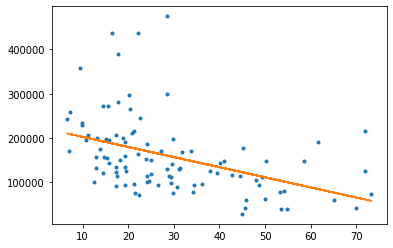

In [15]:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
         sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')

In [16]:
crime_model.coefficients

name,index,value,stderr
(intercept),None,176626.04688088188,11245.588219378818
CrimeRate,None,-576.8049490581088,226.90225950965336


In [17]:
crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309846,16404.024751386656
CrimeRate,None,-2287.6971744328953,491.53747812308956


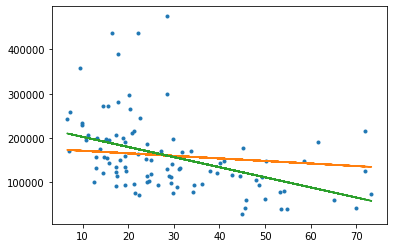

In [18]:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
         sales_noCC['CrimeRate'], crime_model.predict(sales_noCC), '-',
         sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')

In [19]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000]
crime_model_nohighend = turicreate.linear_regression.create(
    sales_nohighend,
    target='HousePrice',
    features=['CrimeRate'],
    validation_set=None,
    verbose=False
)

In [20]:
crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309846,16404.024751386656
CrimeRate,None,-2287.6971744328953,491.53747812308956


In [21]:
crime_model_nohighend.coefficients

name,index,value,stderr
(intercept),None,199073.5896152513,11932.510110455863
CrimeRate,None,-1837.7128098887245,351.5196093328532


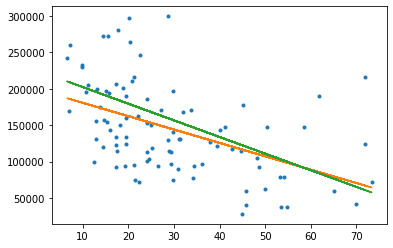

In [22]:
plt.plot(sales_nohighend['CrimeRate'], sales_nohighend['HousePrice'], '.',
         sales_nohighend['CrimeRate'], crime_model_nohighend.predict(sales_nohighend), '-',
         sales_nohighend['CrimeRate'], crime_model_noCC.predict(sales_nohighend), '-')   

ASSIGNMENT


In [23]:
from google.colab import files
uploaded = files.upload()

Saving home_data.sframe.zip to home_data.sframe.zip


In [24]:
from zipfile import ZipFile
file_name = "home_data.sframe.zip"
with ZipFile(file_name,'r')as zip:
  zip.extractall()
  print('Done')

Done


In [48]:
sales = turicreate.SFrame('home_data.sframe/')

In [49]:
train_data,test_data = sales.random_split(.8,seed=0)
import math 

In [50]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


In [51]:
def simple_linear_regression(input_feature, output):
    n = len(input_feature)
    x = input_feature
    y = output
    
    # compute the mean of  input_feature and output
    x_mean = x.mean()
    y_mean = y.mean()
    
    # compute the product of the output and the input_feature and its mean
    sum_xy = (y * x).sum()
    xy_by_n = (y.sum() * x.sum())/n
               
    # compute the squared value of the input_feature and its mean
    x_square = (x**2).sum()
    xx_by_n = (x.sum() * x.sum())/n
               
    # use the formula for the slope
    slope = (sum_xy - xy_by_n) / (x_square - xx_by_n)
    
    # use the formula for the intercept
    intercept = y_mean - (slope * x_mean)
    return (math.trunc(intercept), slope)

In [52]:
test_feature = turicreate.SArray(range(5))
test_output = turicreate.SArray(1 + 1*test_feature)
(test_intercept, test_slope) =  simple_linear_regression(test_feature, test_output)
print ("Intercept: " + str(test_intercept))
print ("Slope: " + str(test_slope))

Intercept: 1
Slope: 1.0


In [53]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'], train_data['price'])

print ("Intercept: " + str(sqft_intercept))
print ("Slope: " + str(sqft_slope))

Intercept: -47116
Slope: 281.9588385676974


In [54]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + (slope * input_feature)
    return predicted_values

In [55]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print ("The estimated price for a house with %d squarefeet is $%.2f" % (my_house_sqft, estimated_price))

The estimated price for a house with 2650 squarefeet is $700074.92


In [56]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
    predicted_values = intercept + (slope * input_feature)
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = output - predicted_values
    # square the residuals and add them up
    RSS = (residuals * residuals).sum()
    return(RSS)

In [58]:
print( get_residual_sum_of_squares(test_feature, test_output, test_intercept, test_slope) )# should be 0.0


0.0


In [61]:
def inverse_regression_predictions(output, intercept, slope):
    estimated_feature= (output-intercept)/(slope)
    return estimated_feature

In [63]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print ("The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet))

The estimated squarefeet for a house worth $800000.00 is 3004


In [67]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['bedrooms'], train_data['price'])

print ("Intercept: " + str(sqft_intercept))
print ("Slope: " + str(sqft_slope))

Intercept: 109473
Slope: 127588.95217458377


In [69]:
rss_prices_on_bedrooms = get_residual_sum_of_squares(test_data['bedrooms'], 
                                                     test_data['price'], 
                                                     sqft_intercept, sqft_slope)
print ('The RSS of predicting Prices based on Bedrooms is : ' + str(rss_prices_on_bedrooms))


The RSS of predicting Prices based on Bedrooms is : 493364587024864.9


In [71]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'], 
                                                      train_data['price'])
rss_prices_on_sqft = get_residual_sum_of_squares(test_data['sqft_living'], 
                                                 test_data['price'], 
                                                 sqft_intercept, sqft_slope)
print ('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is : 275402933737818.28
